In [1]:
import scipy.io

In [2]:
mount

NameError: name 'mount' is not defined

In [2]:
mf = scipy.io.loadmat('/nfs1/tmp/test_img.mat')

In [4]:
mf.keys()


['A',
 'slat',
 '__header__',
 '__globals__',
 'latlim',
 'lonlim',
 'slon',
 '__version__']

In [3]:
sigma0_water = mf['A']['DS'][0][0]['MDS1'][0][0]['sigma0_water'][0][0][:]

In [34]:
sigma0_water.min()

-inf

In [7]:
mf['lonlim']

array([[ 114.79,  115.  ]])

In [8]:
mf['slat'].shape

(5528, 6480)

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='npstere',boundinglat=68,lon_0=45,resolution='l')

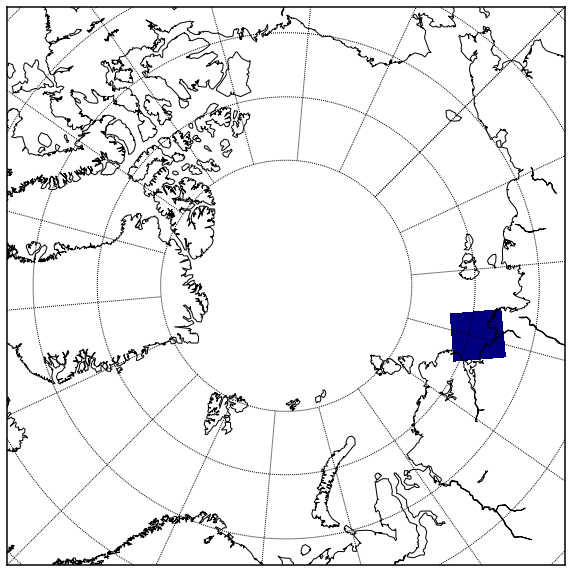

In [37]:
x, y = m(mf['slon'][:],mf['slat'][:])

fig = plt.figure(figsize=(10,10))
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,5.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.pcolormesh(x,y,sigma0_water, vmin=0, vmax=10)

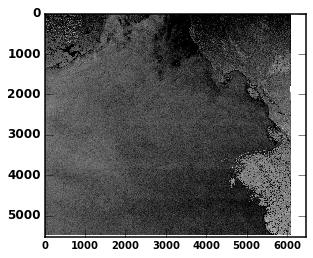

In [8]:
imshow(sigma0_water, vmin=-18, vmax=5, cmap='Greys_r')


In [31]:
mf['lonlim'][0]

array([ 114.79,  115.  ])

In [45]:
mf['latlim'][0]

array([ 73.55,  73.68])

In [87]:
north = mf['latlim'][0][0]
south = mf['latlim'][0][1]
west = mf['lonlim'][0][1]
east = mf['lonlim'][0][0]

mask_lons = np.ma.masked_where((mf['slon'] >= mf['lonlim'][0][0]) & (mf['slon'] <= mf['lonlim'][0][1]), mf['slon'],999)
mask_lats = np.ma.masked_where((mf['slat'] >= mf['latlim'][0][0]) & (mf['slat'] <= mf['latlim'][0][1]), mf['slat'],999)

data_filtered = np.ma.masked_where(((mf['slat'] == mask_lats) & (mf['slon'] == mask_lons)),
                    sigma0_water)

In [103]:
data_filtered.mask=(~mask_lons.mask)|(~mask_lats.mask)

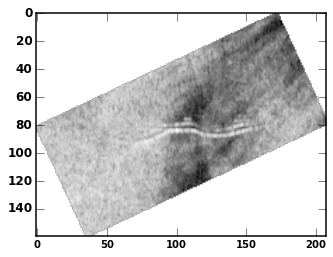

In [133]:
imshow(data_filtered[173:333,2959:3167], cmap='Greys_r')

In [106]:
data_filtered

(5528, 6480)

In [128]:
ma.notmasked_edges(data_filtered,1)[0][1].max()

3130

In [154]:
from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=mf['lonlim'][0][0],llcrnrlat=mf['latlim'][0][0],urcrnrlon=mf['lonlim'][0][1],urcrnrlat=mf['latlim'][0][1],
            epsg=4326,resolution='h')

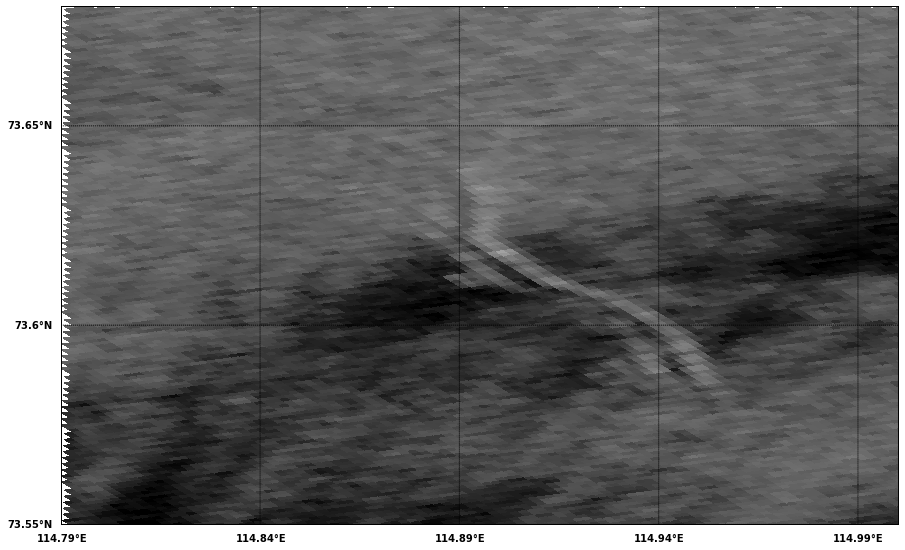

In [155]:
x, y = m(mask_lons,mask_lats)

fig = plt.figure(figsize=(15,15))
# m.drawcoastlines()
m.drawparallels(np.arange(73.55,  73.68,.05),labels=[1,0,0,0],fontsize=10)
m.drawmeridians(np.arange(114.79,115.,.05),labels=[0,0,0,1],fontsize=10)
m.drawmapboundary()
m.pcolormesh(x,y,data_filtered,vmin=-30, vmax=10, cmap='Greys_r')